# Netflix's shows and movies analysis

This dataset contains movies and shows that are featured in Netflix. It was taken from https://www.kaggle.com/shivamb/netflix-shows and I will use it to analyze how the content from Netflix improved with time. This project is part of a course i am following [(click here for more informations about the course)](http://zerotopandas.com), where i learned many things about data analysis.

As a first step, let's upload our Jupyter notebook to [Jovian.ml](https://jovian.ml).

In [150]:
project_name = "netflix-shows-and-movies-analysis"

In [151]:
!pip install jovian --upgrade -q

In [152]:
import jovian

In [ ]:
jovian.commit(project=project_name, files=["netflix_titles.csv"])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


## Data Preparation and Cleaning

We will begin first with importing our data that we took from https://www.kaggle.com/shivamb/netflix-shows and which is contained in  **netflix_titles.csv**

In [103]:
import pandas as pd
import datetime
netflix_titles_raw_df = pd.read_csv("netflix_titles.csv")
netflix_titles_raw_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


The dataset contains exactly 6234 movies and shows that were published on Netflix from 2008-01-01 to 2020-01-18. Each row contains informations about each movie or films and an unique ID.

Let's view some informations about the dataset we have: 

In [104]:
netflix_titles_raw_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [105]:
netflix_titles_raw_df.shape

(6234, 12)

In [106]:
selected_columns = ['type','title','director','cast','country','date_added','release_year','listed_in','duration']

Let's extract a part of our dataframe and copy it so as not to change the original:

In [107]:
netflix_titles_df = netflix_titles_raw_df[selected_columns].copy()
netflix_titles_df

,type,title,director,cast,country,date_added,release_year,listed_in,duration
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,"Children & Family Movies, Comedies",90 min
1,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,Stand-Up Comedy,94 min
2,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,Kids' TV,1 Season
3,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,Kids' TV,1 Season
4,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,Comedies,99 min
...,...,...,...,...,...,...,...,...,...
6229,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...",13 Seasons
6230,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV Comedies,4 Seasons
6231,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,Movies,60 min
6232,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,"British TV Shows, TV Comedies, TV Dramas",2 Seasons


In [108]:
netflix_titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          6234 non-null   object
 1   title         6234 non-null   object
 2   director      4265 non-null   object
 3   cast          5664 non-null   object
 4   country       5758 non-null   object
 5   date_added    6223 non-null   object
 6   release_year  6234 non-null   int64 
 7   listed_in     6234 non-null   object
 8   duration      6234 non-null   object
dtypes: int64(1), object(8)
memory usage: 438.5+ KB


To be able to use the dates let's convert **date_added** and **release_year** to a datetime object

In [109]:
netflix_titles_df.release_year = pd.to_datetime(netflix_titles_df.release_year,format='%Y')
netflix_titles_df.date_added = pd.to_datetime(netflix_titles_df.date_added.str.strip(), format='%B %d, %Y')
netflix_titles_df

,type,title,director,cast,country,date_added,release_year,listed_in,duration
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019-01-01,"Children & Family Movies, Comedies",90 min
1,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016-01-01,Stand-Up Comedy,94 min
2,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013-01-01,Kids' TV,1 Season
3,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016-01-01,Kids' TV,1 Season
4,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017-01-01,Comedies,99 min
...,...,...,...,...,...,...,...,...,...
6229,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015-01-01,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...",13 Seasons
6230,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016-01-01,TV Comedies,4 Seasons
6231,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaT,2016-01-01,Movies,60 min
6232,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013-01-01,"British TV Shows, TV Comedies, TV Dramas",2 Seasons


In [110]:
netflix_titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          6234 non-null   object        
 1   title         6234 non-null   object        
 2   director      4265 non-null   object        
 3   cast          5664 non-null   object        
 4   country       5758 non-null   object        
 5   date_added    6223 non-null   datetime64[ns]
 6   release_year  6234 non-null   datetime64[ns]
 7   listed_in     6234 non-null   object        
 8   duration      6234 non-null   object        
dtypes: datetime64[ns](2), object(7)
memory usage: 438.5+ KB


We can see that the type of the two columns are now **datetime64\[ns\]**

In [111]:
import jovian

In [112]:
jovian.commit(files=["netflix_titles.csv"])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aymenbernoussi/netflix-shows-and-movies-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ml/aymenbernoussi/netflix-shows-and-movies-analysis


'https://jovian.ml/aymenbernoussi/netflix-shows-and-movies-analysis'

## Exploratory Analysis and Visualization

To be able to answer some questions about the data, we need first to visualize the differents variables that we have in front us such as : countries, categories of films, years of release and of publishing netflix, directors and lastly the type(movie or TV show).

Let's begin first by importing the libraries we need.

In [113]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [114]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Countries

We will first begin by seeing in which countries were filmed the films that are featured on Netflix and then rank them by the number of times a movie or TV show was filmed there

In [115]:
countries = netflix_titles_df.set_index(['title'])['country'].str.split(', ', expand=True) \
.stack().reset_index(level=1,drop=True).reset_index().rename(columns={0:'Country','title':'Number of films'}).dropna() \
.groupby("Country").count().sort_values('Number of films', ascending=False).head(10)
print(countries)

                Number of films
Country                        
United States              2609
India                       838
United Kingdom              601
Canada                      318
France                      271
Japan                       231
Spain                       178
South Korea                 162
Germany                     151
Mexico                      129


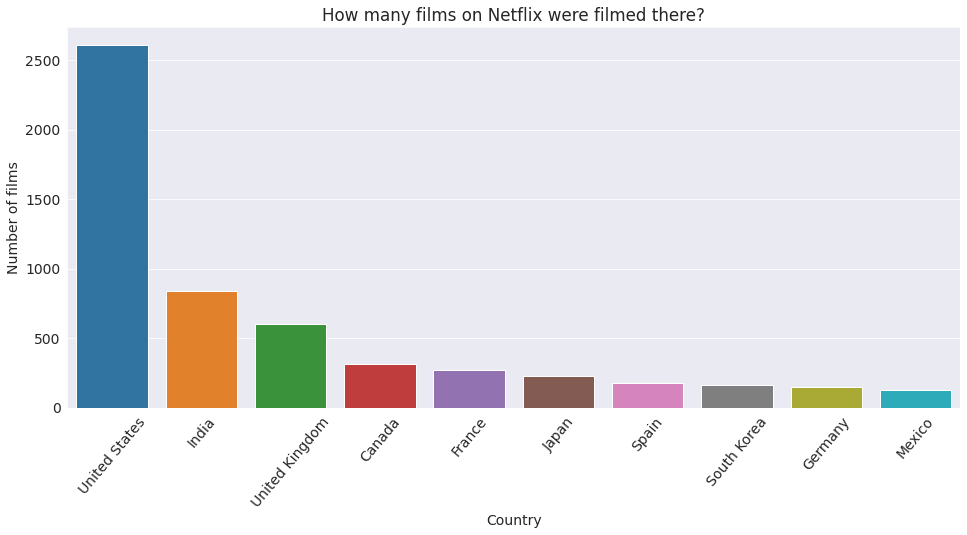

In [116]:
plt.figure(figsize=(16,7))
plt.xticks(rotation=50)
plt.title("How many films on Netflix were filmed there?")
sns.barplot(countries.index, countries['Number of films']);

The graph represents the **10 most famous** locations for Netflix's films.
This shows that the US is where most the films on Netflix are made followed by India and the UK.

### Type of the film

Let's see now the type of films that are shared on Netflix:

First we begin by comparing the number of movies and TV shows.


In [117]:
film_types = netflix_titles_df[["type",'title']].groupby(["type"]).count().rename(columns={"title":"Total"})
print(film_types)

         Total
type          
Movie     4265
TV Show   1969


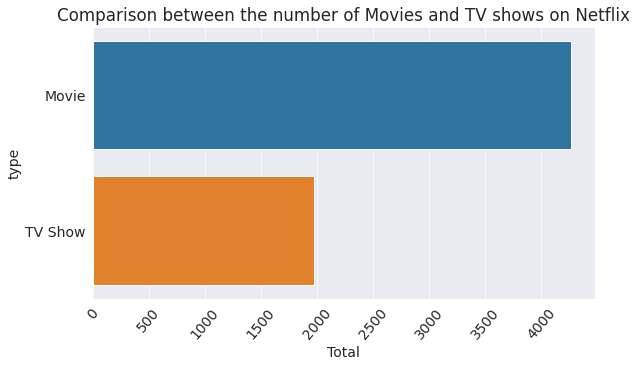

In [118]:
plt.xticks(rotation=50)
plt.title("Comparison between the number of Movies and TV shows on Netflix")
sns.barplot(film_types.Total,film_types.index);

We can represent this data in a **better way**.

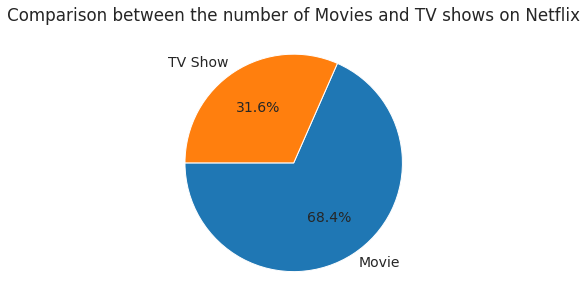

In [119]:
plt.title("Comparison between the number of Movies and TV shows on Netflix")
plt.pie(film_types.Total, labels=film_types.index, autopct='%1.1f%%', startangle=180);

We now see clearly that the number of movies is approximately the double of TV shows.

Now, we can move to see **the evolution of the films with time**.

In [120]:
film_types = netflix_titles_df[["type",'title','date_added']] \
.groupby([netflix_titles_df.date_added.dt.year.rename("year")]) \
.count().rename(columns={"title":"Total"}).drop(['date_added','type'], axis=1)
print(film_types)


        Total
year         
2008.0      2
2009.0      2
2010.0      1
2011.0     13
2012.0      7
2013.0     12
2014.0     25
2015.0     90
2016.0    456
2017.0   1300
2018.0   1782
2019.0   2349
2020.0    184


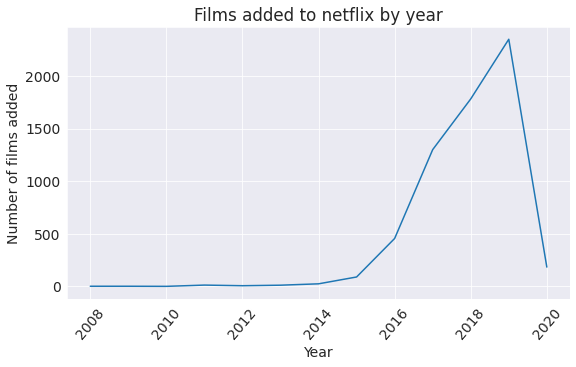

In [121]:
plt.xticks(rotation=50)
plt.title("Films added to netflix by year")
plt.xlabel("Year")
plt.ylabel("Number of films added")
plt.plot(film_types.index,film_types.Total);

In [122]:
film_types = netflix_titles_df[["type",'title','date_added']] \
.groupby(["type",netflix_titles_df.date_added.dt.year.rename("year")]) \
.count().rename(columns={"title":"Total"}).drop(['date_added'], axis=1).reset_index().set_index("year")
movies = film_types[film_types["type"]=="Movie"].drop(["type"], axis=1).cumsum()
shows = film_types[film_types["type"]=="TV Show"].drop(["type"], axis=1).cumsum()

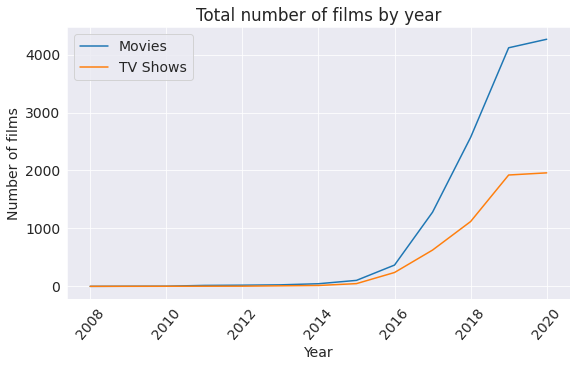

In [123]:
plt.xticks(rotation=50)
plt.title("Total number of films by year")
plt.xlabel("Year")
plt.ylabel("Number of films")
plt.plot(movies.index, movies.Total);
plt.plot(shows.index, shows.Total);
plt.legend(["Movies","TV Shows"])
plt.show()

### Categories of films

We will now study the differents categories of films to see the most common ones.


In [124]:
categories = netflix_titles_df["listed_in"].str.split(',', expand=True) \
.stack().reset_index(level=0).dropna() \
.rename(columns={0:"Category"}).groupby("Category").count() \
.rename(columns={"level_0":"Total"}).sort_values("Total", ascending=False)
print(categories)

                           Total
Category                        
 International Movies       1842
Dramas                      1077
Comedies                     803
Documentaries                644
Action & Adventure           597
...                          ...
 Classic & Cult TV             5
Romantic Movies                2
Sports Movies                  1
Spanish-Language TV Shows      1
TV Sci-Fi & Fantasy            1

[72 rows x 1 columns]


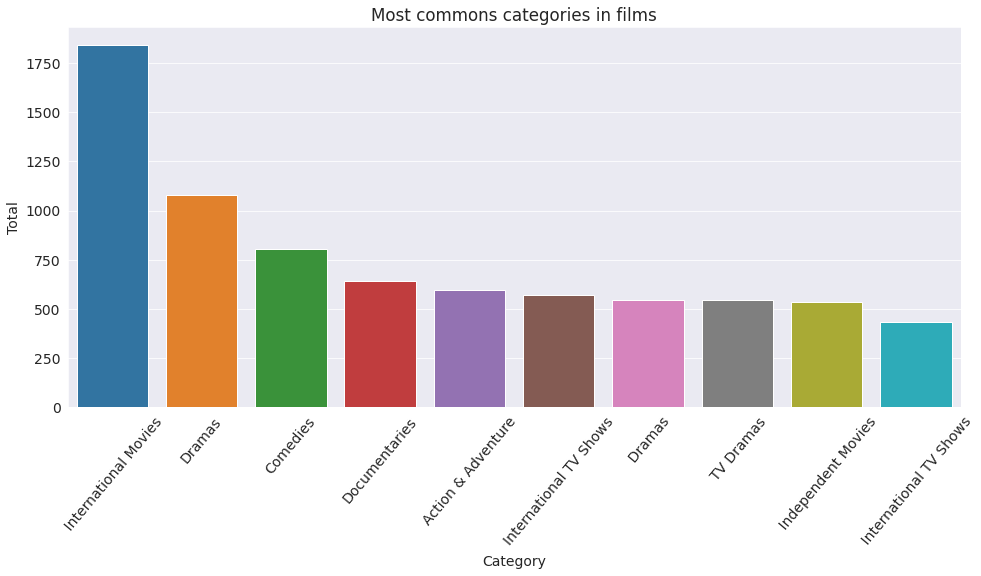

In [125]:
plt.figure(figsize=(16,7))
plt.xticks(rotation=50)
plt.title("Most commons categories in films")
sns.barplot(categories.head(10).index, categories.head(10).Total);

In [126]:
categories_for_pie = categories.head(10)
categories_for_pie = categories_for_pie.reset_index() \
.append(pd.DataFrame([["Others",categories.Total.sum()-categories.head(10).Total.sum()]] \
                    ,columns=['Category',"Total"])).set_index("Category")
print(categories_for_pie)

                         Total
Category                      
 International Movies     1842
Dramas                    1077
Comedies                   803
Documentaries              644
Action & Adventure         597
International TV Shows     570
 Dramas                    546
 TV Dramas                 543
 Independent Movies        534
 International TV Shows    431
Others                    6083


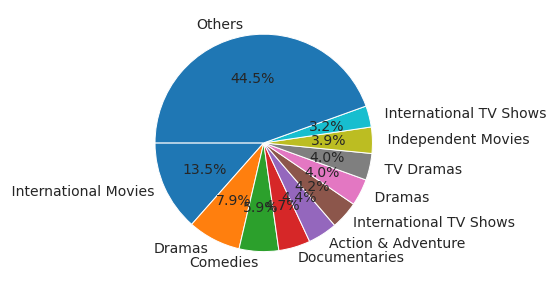

In [127]:
plt.pie(categories_for_pie.Total, labels=categories_for_pie.index, autopct='%1.1f%%', startangle=180);

We can see that the 10 most commons categories represents **more than half** of all the films on Netflix

In [128]:
import jovian

In [129]:
jovian.commit(files=["netflix_titles.csv"])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aymenbernoussi/netflix-shows-and-movies-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ml/aymenbernoussi/netflix-shows-and-movies-analysis


'https://jovian.ml/aymenbernoussi/netflix-shows-and-movies-analysis'

## Asking and Answering Questions

We now have a rough idea about the dataset we're working with. Let's ask some questions and try to answer them to obtain more informations.

### Q : In which country were filmed the most films in 2019 ?

This  might help us understand which country produces the most films and maybe see if it produced more or less than the previous years. 

In [130]:
countries_2019 = netflix_titles_df.set_index(['date_added'])['country'].str.split(', ', expand=True) \
.stack().reset_index().drop(columns=["level_1"]).rename(columns={0:"country"}) \
.groupby([netflix_titles_df.date_added.dt.year,"country"]).count().rename(columns={"date_added":"count"}) \
.reset_index()
countries_2019 = countries_2019.loc[countries_2019['date_added'] == 2019].sort_values("count",ascending=False).head(10) \
.drop(["date_added"],axis=1).set_index("country")
print(countries_2019)

                count
country              
United States     827
India             307
United Kingdom    202
Canada            100
France             98
Spain              54
Japan              54
China              50
Mexico             46
South Korea        44


Let's know visualize our data to see where it was most filmed in 2019

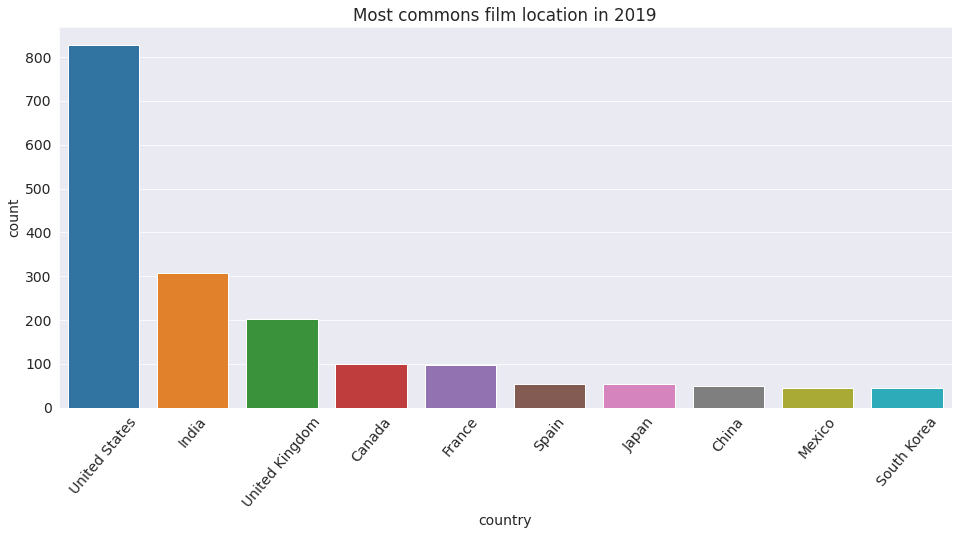

In [131]:
plt.figure(figsize=(16,7))
plt.xticks(rotation=50)
plt.title("Most commons film location in 2019")
sns.barplot(countries_2019.index, countries_2019["count"]);

We see here that the most country that produced the most films on Netflix  is the US followed by India and the UK.

### Q : In which year were added the biggest number of films ?

This will help us understand the growth of Netflix and also find the causes of this by using other datasets (for example the number of subscriptions in that year).

In [132]:
films_added_by_year = netflix_titles_df.set_index("date_added").title \
.reset_index().groupby([netflix_titles_df.date_added.dt.year]).count() \
.rename(columns={"date_added":"Number of films added"}).drop(columns=["title"]) \
.sort_values("Number of films added", ascending=False)
print(films_added_by_year)

            Number of films added
date_added                       
2019.0                       2349
2018.0                       1782
2017.0                       1300
2016.0                        456
2020.0                        184
2015.0                         90
2014.0                         25
2011.0                         13
2013.0                         12
2012.0                          7
2008.0                          2
2009.0                          2
2010.0                          1


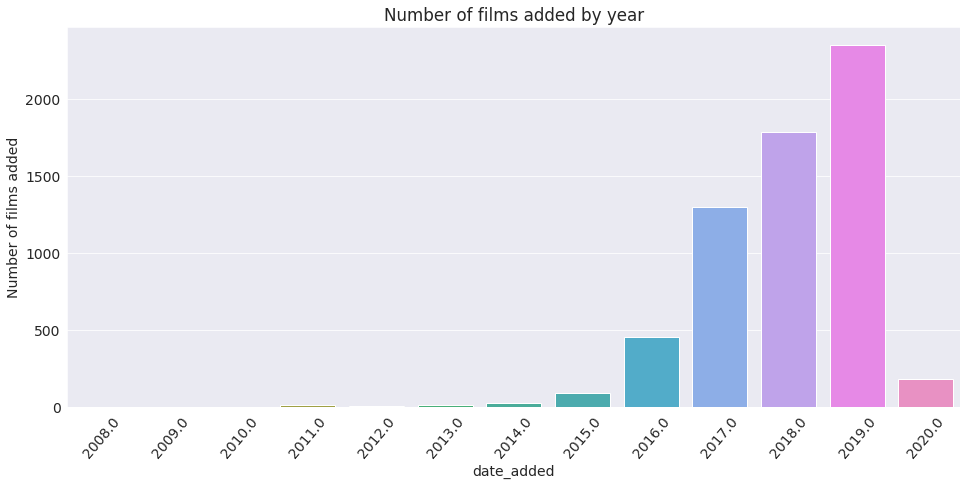

In [133]:
plt.figure(figsize=(16,7))
plt.xticks(rotation=50)
plt.title("Number of films added by year")
plt.xlabel("Year")
sns.barplot(films_added_by_year.index, films_added_by_year["Number of films added"]);

We can clearly see that the number of films added each year is increasing by **nearly 500 from 2016 to 2019**. The data from **2020** is **not relevant in this case** since it only stops on January (but we can predict that the number of films might drop considering the spread of COVID19 and the lockdown imposed by many countries).

### Q : Which director produced the most films featured on Netflix ?

In [134]:
directors = netflix_titles_df.director.str.split(', ', expand=True).stack() \
.reset_index().drop(columns=["level_0","level_1"]).dropna().rename(columns={0:"Directors"})
directors["Number of films"] = directors.Directors
directors = directors.groupby("Directors").count().sort_values("Number of films", ascending=False).head(10)
print(directors)

                  Number of films
Directors                        
Jan Suter                      21
Raúl Campos                    19
Jay Karas                      14
Marcus Raboy                   14
Jay Chapman                    12
Martin Scorsese                 9
Steven Spielberg                9
Umesh Mehra                     8
Lance Bangs                     8
David Dhawan                    8


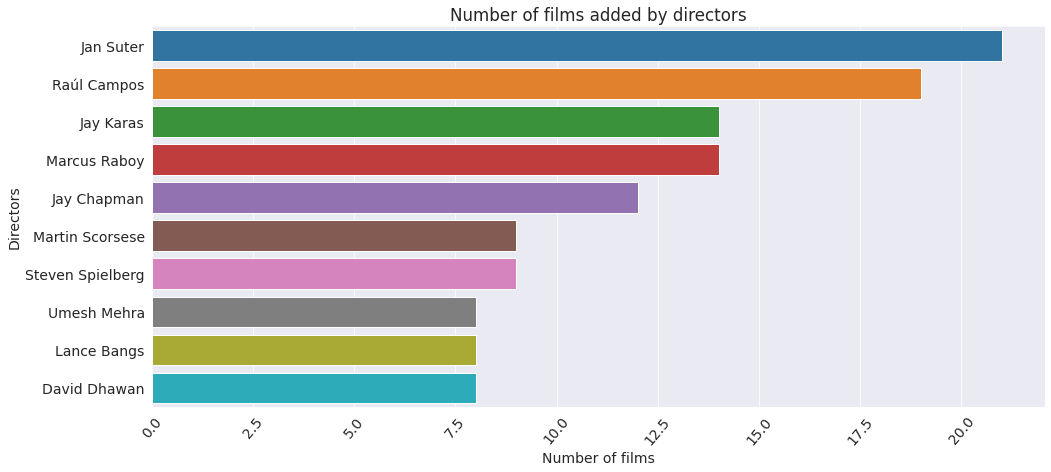

In [135]:
plt.figure(figsize=(16,7))
plt.xticks(rotation=50)
plt.title("Number of films added by directors")
sns.barplot(directors["Number of films"], directors.index);

We can here see the 10 directors whose films were featured the most on Netflix.

### Q : Which actor appeared in the most films on Netflix ?

In [136]:
actors = netflix_titles_df.cast.str.split(', ', expand=True).stack() \
.reset_index().drop(columns=["level_0","level_1"]).dropna().rename(columns={0:"Actors"})
actors["Number of films"] = actors.Actors
actors = actors.groupby("Actors").count().sort_values("Number of films", ascending=False).head(10)
print(actors)

                  Number of films
Actors                           
Anupam Kher                    33
Shah Rukh Khan                 30
Om Puri                        27
Naseeruddin Shah               27
Akshay Kumar                   26
Yuki Kaji                      26
Takahiro Sakurai               25
Paresh Rawal                   25
Amitabh Bachchan               24
Boman Irani                    23


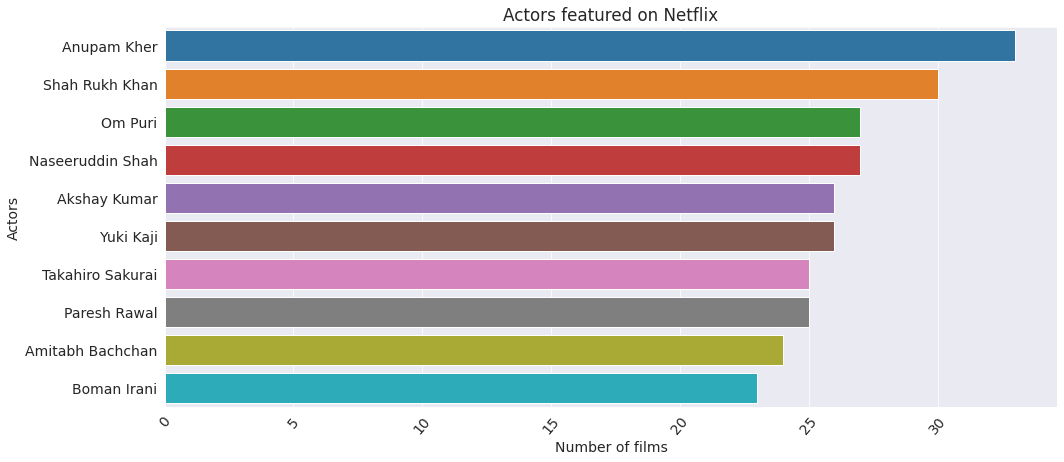

In [137]:
plt.figure(figsize=(16,7))
plt.xticks(rotation=50)
plt.title("Actors featured on Netflix")
sns.barplot(actors["Number of films"], actors.index);

We can see here that the actors that are most featured on Netflix are mainly **Indian or Japanese** 

### Q : How long are the films on Netflix (movies and TV shows) ?

We have first to distinguish between movies and TV shows:

In [138]:
movies_time = netflix_titles_df[["title","type","duration"]]
movies_time = movies_time[movies_time["type"]=="Movie"]
print(movies_time)
time = movies_time["duration"].str.split(" ", expand=True).drop(columns=1).astype(int)
time_categories = pd.DataFrame(columns=["Number of films"])
time_categories.loc["x<60",["Number of films"]] = time[time<=60].dropna().count().iloc[0]
time_categories.loc["60<x<=120",["Number of films"]] = time[(time<=120) & (time>60)].dropna().count().iloc[0]
time_categories.loc["x>120",["Number of films"]] = time[120<time].dropna().count().iloc[0]
print(time_categories)

                                        title   type duration
0     Norm of the North: King Sized Adventure  Movie   90 min
1                  Jandino: Whatever it Takes  Movie   94 min
4                                #realityhigh  Movie   99 min
6                                    Automata  Movie  110 min
7          Fabrizio Copano: Solo pienso en mi  Movie   60 min
...                                       ...    ...      ...
5577                          Frank and Cindy  Movie   70 min
5578                          Frank and Cindy  Movie  102 min
5579                                  Iverson  Movie   88 min
5580      Jeremy Scott: The People's Designer  Movie  109 min
6231   Little Baby Bum: Nursery Rhyme Friends  Movie   60 min

[4265 rows x 3 columns]
          Number of films
x<60                  353
60<x<=120            3085
x>120                 827


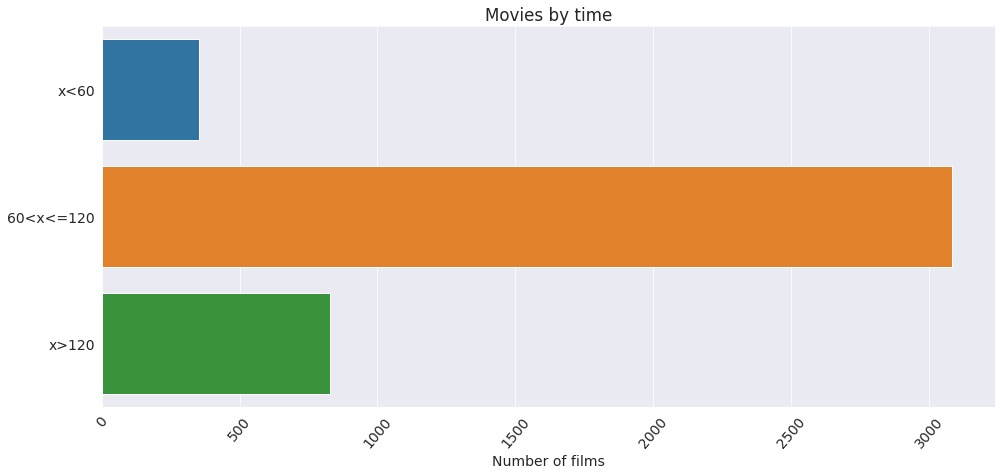

In [139]:
plt.figure(figsize=(16,7))
plt.xticks(rotation=50)
plt.title("Movies by time")
sns.barplot(time_categories["Number of films"], time_categories.index);

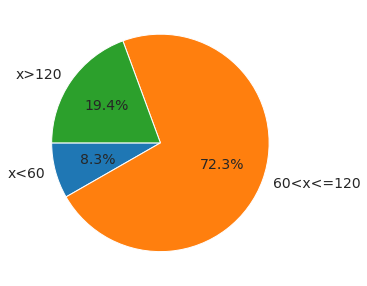

In [140]:
plt.pie(time_categories["Number of films"], labels=time_categories.index, autopct='%1.1f%%', startangle=180);

We can see that most movies on Netflix are **between 1 and 2 hours**. They represent **more than 70%** of the total of movies featured on there.

In [141]:
shows_time = netflix_titles_df[["title","type","duration"]]
shows_time = shows_time[shows_time["type"]=="TV Show"]
print(shows_time)
time = shows_time["duration"].str.split(" ", expand=True).drop(columns=1).astype(int)
time_categories = pd.DataFrame(columns=["Number of films"])
time_categories.loc["x<3",["Number of films"]] = time[time<=3].dropna().count().iloc[0]
time_categories.loc["3<x<=6",["Number of films"]] = time[(time<=6) & (time>3)].dropna().count().iloc[0]
time_categories.loc["x>6",["Number of films"]] = time[6<time].dropna().count().iloc[0]
print(time_categories)

                                            title     type    duration
2                              Transformers Prime  TV Show    1 Season
3                Transformers: Robots in Disguise  TV Show    1 Season
5                                         Apaches  TV Show    1 Season
8                                    Fire Chasers  TV Show    1 Season
26                                Castle of Stars  TV Show    1 Season
...                                           ...      ...         ...
6228                                     Kikoriki  TV Show   2 Seasons
6229                                 Red vs. Blue  TV Show  13 Seasons
6230                                        Maron  TV Show   4 Seasons
6232  A Young Doctor's Notebook and Other Stories  TV Show   2 Seasons
6233                                      Friends  TV Show  10 Seasons

[1969 rows x 3 columns]
       Number of films
x<3               1783
3<x<=6             129
x>6                 57


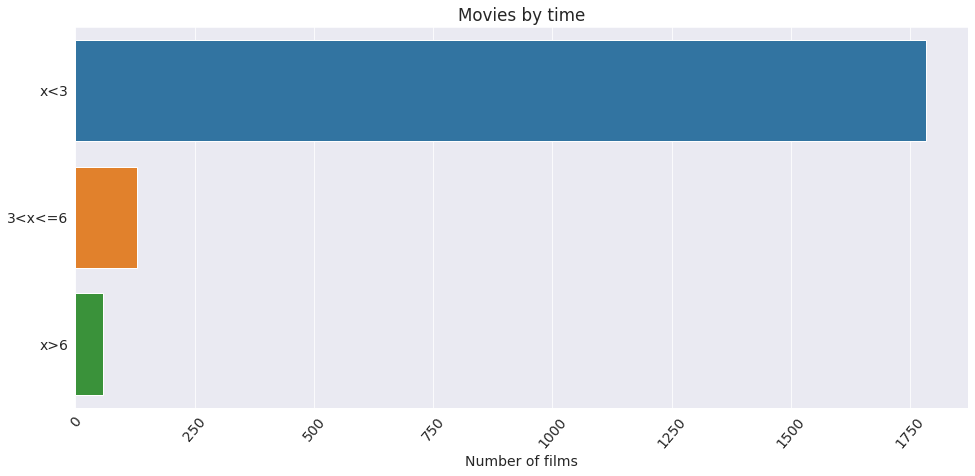

In [142]:
plt.figure(figsize=(16,7))
plt.xticks(rotation=50)
plt.title("Movies by time")
sns.barplot(time_categories["Number of films"], time_categories.index);

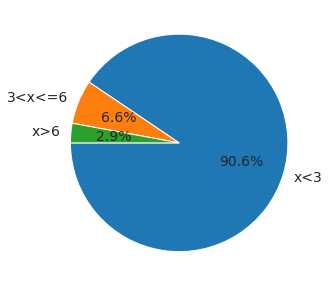

In [143]:
plt.pie(time_categories["Number of films"], labels=time_categories.index, autopct='%1.1f%%', startangle=180);

We can that most TV shows featured on Netflix **last less than 3 seasons**. They represent **nearly 90%** of all TV shows there.

In [144]:
import jovian

In [145]:
jovian.commit(files=["netflix_titles.csv"])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aymenbernoussi/netflix-shows-and-movies-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ml/aymenbernoussi/netflix-shows-and-movies-analysis


'https://jovian.ml/aymenbernoussi/netflix-shows-and-movies-analysis'

## Inferences and Conclusion

We drew some very important conclusions from this study. We can summarize them in :

* Most Netflix films are made in The US which is normal considered that Netflix is an american company.
* The are nearly 2X times more movies than TV shows which can be justified considering that movies take less time to make
* We can an increase in the number of movies which shows the growth of Netflix.
* The most famous categories are the International Movies which is normal considering that they have a much larger audience.

In [146]:
import jovian

In [147]:
jovian.commit(files=["netflix_titles.csv"])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aymenbernoussi/netflix-shows-and-movies-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ml/aymenbernoussi/netflix-shows-and-movies-analysis


'https://jovian.ml/aymenbernoussi/netflix-shows-and-movies-analysis'

## References and Future Work

### References :

* https://www.kaggle.com/shivamb/netflix-shows : Source of the dataset
* https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas : The course which I followed
* https://pandas.pydata.org/docs/ : Pandas documentation

In [148]:
import jovian

In [149]:
jovian.commit(files=["netflix_titles.csv"])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aymenbernoussi/netflix-shows-and-movies-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ml/aymenbernoussi/netflix-shows-and-movies-analysis


'https://jovian.ml/aymenbernoussi/netflix-shows-and-movies-analysis'